In [1]:
# using texture for segmentation
# scratch array single image segmentation

import matplotlib.pyplot as plt
from skimage import io

In [2]:
import numpy as np
from skimage.filters import threshold_otsu
import cv2

In [3]:
# use glob to import multiple images and load them
import glob

In [4]:
#select the path
path = "test_images/imgs/*.*"
img_number = 1  #Start an iterator for image number.
#This number can be later added to output image file names.

In [105]:
#for file in glob.glob(path):
for file in sorted(glob.glob('images/*[0-5].*')):
    print(file)     #just stop here to see all file names printed
    img= cv2.imread(file, 0)  #now, we can read each file since we have the full path

images/1_1.jpg
images/1_2.jpg
images/1_3.jpg
images/1_4.jpg
images/Poster_IGC_A0_Print_low2.pdf


In [6]:
#img = io.imread("images/scratch_assay/1_2.jpg")
#plt.imshow(img)

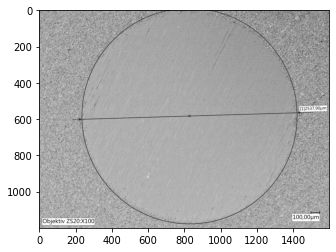

In [88]:
img = io.imread("images/1_3.jpg", as_gray=True)
plt.imshow(img, cmap="gray")

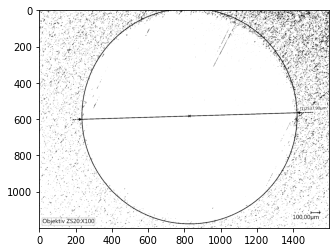

In [89]:
#Gabor filter

ksize=45
theta=np.pi/3
kernel = cv2.getGaborKernel((ksize, ksize), 1, theta, 75, 50, 0, ktype=cv2.CV_32F)

filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')

/var/folders/7c/mfjfp21x5mv5gjlvtzsgn0lm0000gn/T/ipykernel_56018/1674197849.py:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_img = entropy(img, disk(60))


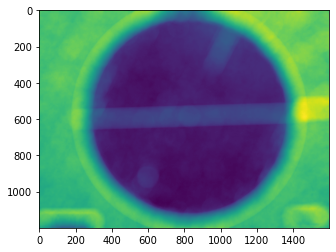

In [90]:
# Entropy filter
from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(img, disk(60))
plt.imshow(entropy_img)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

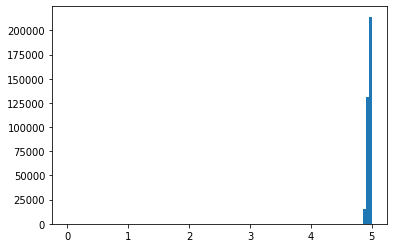

In [91]:
plt.hist(entropy_img.flat, bins=100, range=(0,5))

In [92]:
thresh = threshold_otsu(entropy_img)

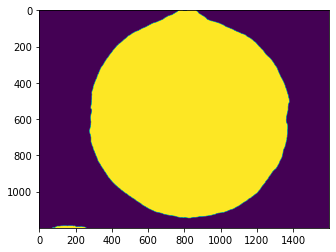

In [93]:
# binarize the entropy image

binary = entropy_img <= thresh
plt.imshow(binary)

In [94]:
#diameter measurement
image = binary
scale = 2.3035 #microns/pixel (assumed, need to be changed)

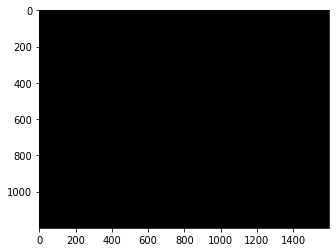

In [95]:
#Remove edge touching regions (if there is breaks in borders, this filter will remove it)
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(image)
plt.imshow(edge_touching_removed, cmap='gray')

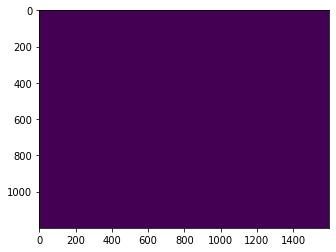

In [96]:
# assigns the connected objects and labels
from skimage import measure, io, img_as_ubyte
label_image = measure.label(edge_touching_removed, connectivity=image.ndim)
plt.imshow(label_image)

In [97]:
# to change the color if there are multiple connected objects in the image
from skimage.color import label2rgb, rgb2gray
image_label_overlay = label2rgb(label_image, image=image)

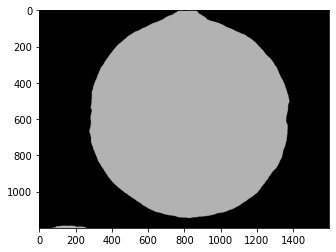

In [98]:
plt.imsave("labeled/labeled_SSD.jpg", image_label_overlay)
plt.imshow(image_label_overlay)

In [99]:
measured_image = image_label_overlay
cv2.imwrite("test_images/measured/measured_image"+str(img_number)+".jpg", measured_image)
img_number +=1

In [100]:
props = measure.regionprops_table(label_image,image, properties =['label', 'area', 'equivalent_diameter'])

In [101]:
import pandas as pd
df = pd.DataFrame(props)
print(df.head())

Empty DataFrame
Columns: [label, area, equivalent_diameter]
Index: []


In [102]:
#to delete small regions
df = df[df['area'] > 50]
print(df.head())

Empty DataFrame
Columns: [label, area, equivalent_diameter]
Index: []


In [103]:
df['equivalent_diameter_microns'] = df['equivalent_diameter']*(scale)
print(df.head())

Empty DataFrame
Columns: [label, area, equivalent_diameter, equivalent_diameter_microns]
Index: []
